# Análisis de Calidad de Datos

##### ***Emma Arenas Villaverde***
***

<br>

<div>
    <h3>Índice</h3>
    <ul>
        <li><a href="#treatment">1. Tratamiento de los Datos</a></li>
        <ul>
            <li><a href="#libraries">1.1. Importar Librerías</a></li>
            <li><a href="#load-data">1.2. Cargar Dataset Análisis</a></li>
        </ul>
        <li><a href="#analysis">2. Análisis</a></li>
        <ul>
            <li><a href="#data-info">2.1. Información de los Datos</a></li>
            <li><a href="#duplicates">2.2. Detección de Registros Duplicados</a></li>
            <li><a href="#na-values">2.3. Detección de Valores "NA"</a></li>
            <li><a href="#atypical-values">2.4. Detección de Valores Atípicos</a></li>
            </ul>
        <li><a href="#calculations">3. Algunos Cálculos Estadísticos...</a></li>
</div>

<br>

## 1. Tratamiento de los Datos<a id="treatment"></a>

### 1.1. Importar Librerías<a id="libraries"></a>

In [ ]:
install.packages("readr") # para leer archivos CSV
install.packages("dplyr") # para manipulación de datos
library(readr) 
library(dplyr) 

### 1.2. Cargar Dataset <a id="data-info"></a>

In [ ]:
BBDD_Locales <- read_csv2("data/BBDD_Locales.csv") #  la función read_csv2 viene configurada por defecto para utilizar el punto y coma como delimitador

<br>

## 2. Análisis <a id="analysis"></a>

### 2.1. Información de los Datos <a id="data-info"></a>

In [3]:
dim(BBDD_Locales) # para obtener sus dimensiones

[1] 766   7

In [4]:
str(BBDD_Locales) # para ver su estructura interna

spc_tbl_ [766 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ municipio   : chr [1:766] "Municipio29" "Municipio29" "Municipio29" "Municipio29" ...
 $ sector      : chr [1:766] "Menaje" "Otros" "No alimentario" "Otros" ...
 $ situacion   : chr [1:766] "calle" "calle" "calle" "calle" ...
 $ forma       : chr [1:766] "SL" "SL" "SA" "individual" ...
 $ superficie  : num [1:766] 99.3 22.5 NA 24.9 21.2 ...
 $ trabajadores: num [1:766] 6 3 3 1 2 5 3 4 1 4 ...
 $ antiguedad  : num [1:766] 36.5 14.2 9 11.4 17.1 26.9 13.3 13.5 29.6 6.4 ...
 - attr(*, "spec")=
  .. cols(
  ..   municipio = col_character(),
  ..   sector = col_character(),
  ..   situacion = col_character(),
  ..   forma = col_character(),
  ..   superficie = col_double(),
  ..   trabajadores = col_double(),
  ..   antiguedad = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [5]:
head(BBDD_Locales, n = 766) # para ver sus filas

municipio,sector,situacion,forma,superficie,trabajadores,antiguedad
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Municipio29,Menaje,calle,SL,99.32,6,36.5
Municipio29,Otros,calle,SL,22.51,3,14.2
Municipio29,No alimentario,calle,SA,NA,3,9.0
Municipio29,Otros,calle,individual,24.85,1,11.4
Municipio29,Equipamientos culturales,calle,SA,21.21,2,17.1
Municipio29,Alimentario,calle,SA,46.14,5,26.9
Municipio29,No alimentario,calle,SA,44.96,3,13.3
Municipio29,Ocio y cultura,centro comercial,SL,35.16,4,13.5
Municipio29,Alimentario,calle,SA,20.48,1,29.6


- **Número de registros**: la base de datos contiene un total de **766 registros**, donde cada uno ellos representa una entrada de datos correspondiente a `Municipio29`.  
- **Número de columnas**: la estructura de la base de datos cuenta con **7 columnas**, donde cada una de ellas posee atributos específicos relativos al municipio de estudio.  
- **Tipología de las variables**: en cuanto a la tipología de las variables, hay almacenados tanto datos de tipo numeric `num` (indicando números decimales), como de tipo character `chr` (reflejando cadenas de texto).

### 2.2. Detección de Registros Duplicados <a id="duplicates"></a>

En esta parte del estudio, se han identificado los registros duplicados y se han almacenado en `duplicados` para su visualización:

In [8]:
duplicados<- BBDD_Locales %>% 
  filter(duplicated(.)) # para obtener sus duplicados

In [9]:
head(duplicados)

municipio,sector,situacion,forma,superficie,trabajadores,antiguedad
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Municipio29,Menaje,calle,SA,16.45,1,16.2
Municipio29,Alimentario,calle,individual,10.30,1,18.1


Tal y como se puede observar, se han detectado **2 registros duplicados**. A partir de aquí, se ha procedido a su eliminación, dejando al actual dataset sin duplicados.

In [10]:
BBDD_Locales <- BBDD_Locales %>%
    distinct()

A continuación, se comprueba si se han eliminado correctamente:

In [11]:
sum(duplicated(BBDD_Locales))

[1] 0

### 2.3. Detección de Valores “NA” <a id="na-values"></a>

> En Variable `superficie` : estimarlo con el estadístico **media**

In [56]:
na_superficie <- any(is.na(BBDD_Locales$superficie)) # para detectar valores "NA"
na_superficie

[1] FALSE

Una vez detectados los valores "NA", se realiza la estimación, asegurando excluir los valores faltantes en el cálculo mediante el argumento `na.rm = TRUE` :

In [13]:
BBDD_Locales <- BBDD_Locales %>%
  mutate(superficie = ifelse(is.na(superficie), mean(superficie, na.rm = TRUE), superficie)) # para transformar las variables

> En Variable `trabajadores` : estimarlo con el estadístico **máximo**

In [58]:
na_trabajadores <- any(is.na(BBDD_Locales$trabajadores)) # para detectar valores "NA"
na_trabajadores

[1] FALSE

En cuanto a la columna `trabajadores` , sus valores "NA" han sido sustituidos por el valor máximo, nuevamente excluyendo los valores faltantes en el cálculo:

In [59]:
BBDD_Locales <- BBDD_Locales %>%
  mutate(trabajadores = ifelse(is.na(trabajadores), max(trabajadores, na.rm = TRUE), trabajadores)) # para transformar las variables

Finalmente, se comprueba que ya no existen valores vacíos:

In [16]:
sum(is.na(BBDD_Locales$superficie)) # para contar la cantidad de NA
sum(is.na(BBDD_Locales$trabajadores)) # para contar la cantidad de NA

[1] 0

[1] 0

### 2.4. Detección de Valores Atípicos <a id="atypical-values"></a>

> Box-plot

Se crea un gráfico de los valores atípicos de la columna `superficie`:

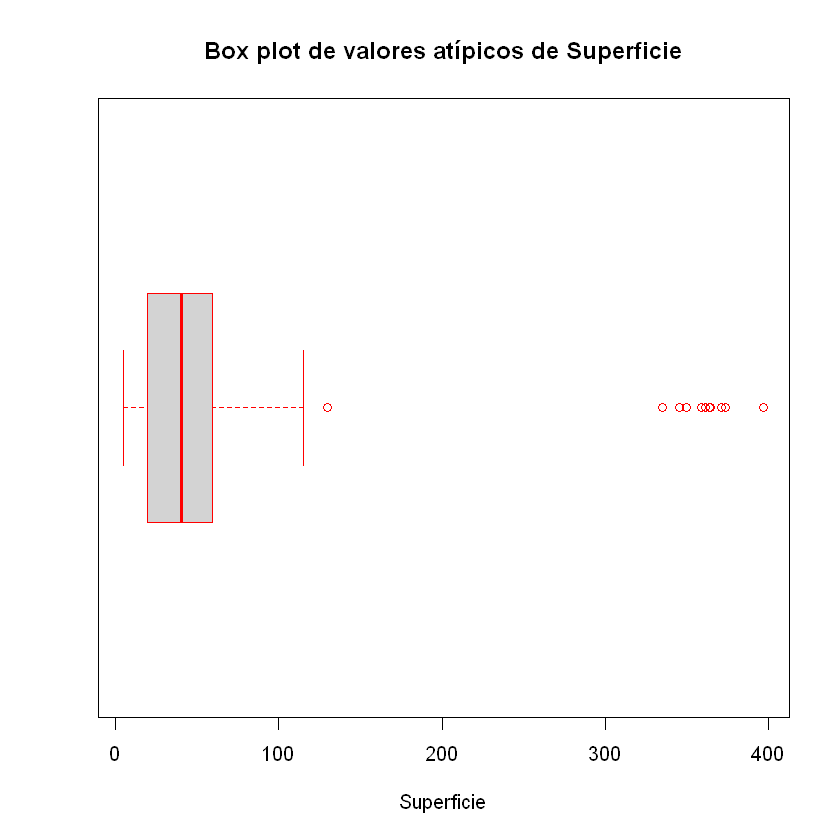

In [32]:
boxplot_superficie <- boxplot(BBDD_Locales$superficie,
                             horizontal = TRUE,
                             border = "red",
                             main = "Box plot de valores atípicos de Superficie",
                             xlab = "Superficie") # para crear un gráfico box-plot

Se detectan **12 desviaciones**:

In [62]:
atipicos_superficie <- boxplot_superficie$out # para extraer los atípicos del box-plot
atipicos_superficie
numero_atipicos_superficie <- length(atipicos_superficie) # para conocer el número de átipicos
numero_atipicos_superficie

[1] 358.65 345.27 364.19 363.84 370.98 334.64 349.50 397.07 358.93 361.02
[11] 129.65 373.53

[1] 12

A continuación, se realiza exactamente el mismo proceso para la columna `trabajadores` .

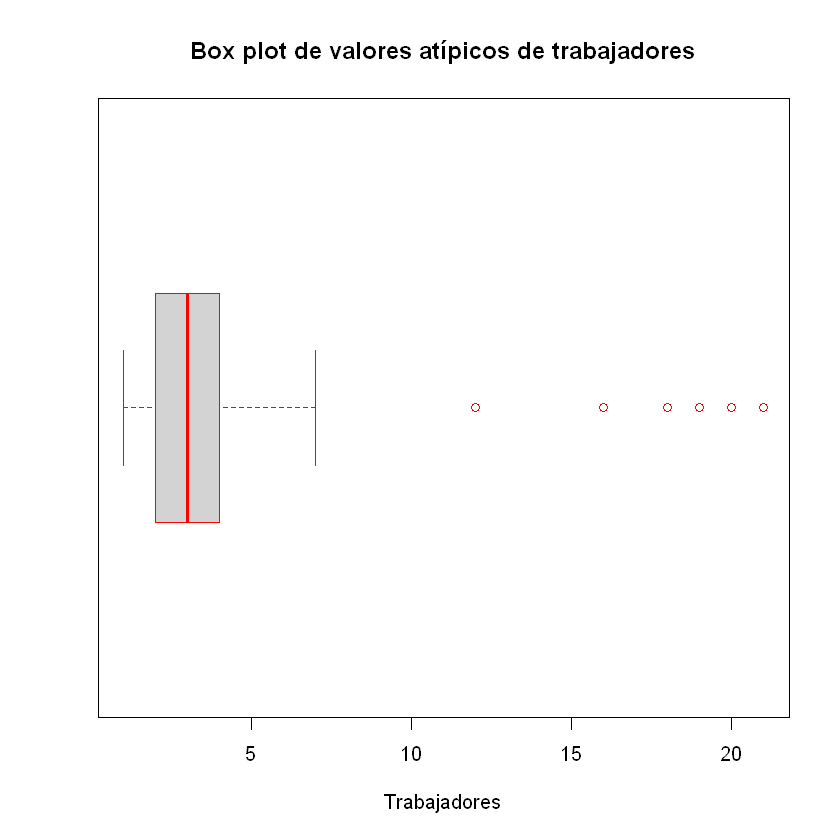

In [19]:
boxplot_trabajadores <- boxplot(BBDD_Locales$trabajadores,
                            horizontal = TRUE,
                            border = "red",
                            main = "Box plot de valores atípicos de Trabajadores",
                            xlab = "Trabajadores") # para crear un gráfico box-plot

Se detectan **14 desviaciones**:

In [64]:
atipicos_trabajadores <- boxplot_trabajadores$out # para extraer los atípicos del box-plot
atipicos_trabajadores
numero_atipicos_trabajadores <- length(atipicos_trabajadores) # para conocer el número de átipicos
numero_atipicos_trabajadores

[1] 21 18 21 16 20 18 19 21 18 18 21 18 12 18

[1] 14

> Z-score

Respecto al método z-score, primeramente se usa la función `scale()` a fin de calcular las desviaciones de `superficie`. Luego, se establece un **umbral de 2** para identificar valores atípicos.

In [65]:
z_scores_superficie <- scale(BBDD_Locales$superficie) # para calcular las desviaciones
atipicos_z_score_superficie <- which(abs(z_scores_superficie) > 2)
atipicos_z_score_superficie
numero_atipicos_superficie2 <- length(atipicos_z_score_superficie) # para conocer el número de átipicos
numero_atipicos_superficie2

[1]  90 111 186 260 270 306 334 339 347 451 696

[1] 11

Ante esto, se observa que la diferencia de desviación entre métodos es de **1**. Esto se debe a que box-plot se basa en cuartiles y rangos intercuartiles (IQR) para identificar valores atípicos, lo que puede llevar a que los valores extremos se consideren atípicos solo si están muy lejos de la mayoría de los datos. El método z-score, por su parte, identifica un número diferente de valores atípicos; ya que se centra en la distancia entre cada punto de
datos y la media.

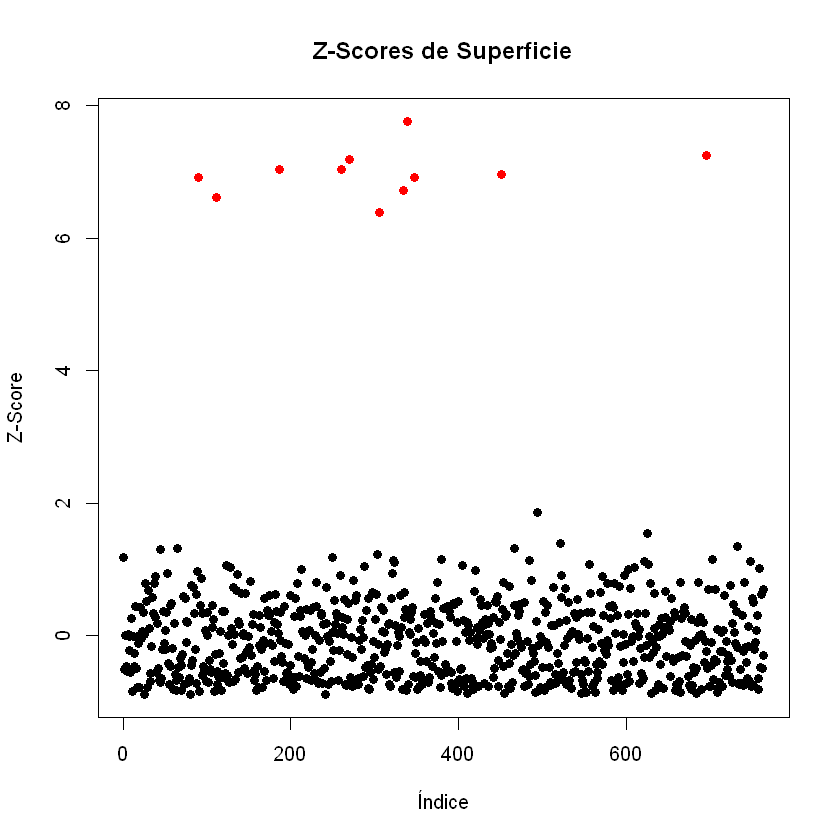

In [42]:
plot(z_scores_superficie, main = "Z-Scores de Superficie", xlab = "Índice", ylab = "Z-Score",
     pch = 19, col = ifelse(abs(z_scores_superficie) > 2, "red", "black"))

Con la columna `trabajadores` se hace exactamente lo mismo, y esta vez la diferencia ha
sido nula:

In [66]:
z_scores_trabajadores <- scale(BBDD_Locales$trabajadores) # para calcular las desviaciones
atipicos_z_score_trabajadores <- which(abs(z_scores_trabajadores) > 2)
atipicos_z_score_trabajadores
numeros_atipicos_trabajadores2 <- length(atipicos_z_score_trabajadores) # para conocer el número de átipicos
numeros_atipicos_trabajadores2

[1]  85  90 111 186 260 270 306 334 339 347 412 451 602 696

[1] 14

En este caso, puede ser que los datos sigan una distribución relativamente simétrica y los
valores atípicos se encuentren lejos de la media.

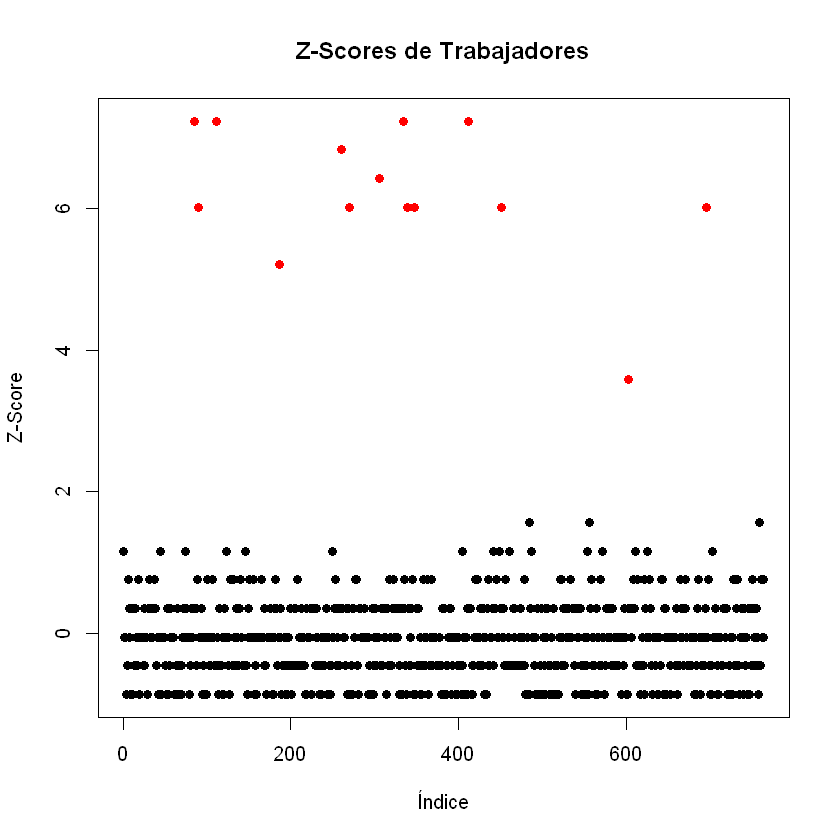

In [25]:
plot(z_scores_trabajadores, main = "Z-Scores de Trabajadores", xlab = "Índice", ylab = "Z-Score",
     pch = 19, col = ifelse(abs(z_scores_trabajadores) > 2, "red", "black"))

<br>

## 3. Algunos Cálculos Estadísticos... <a id="calculations"></a>

> Superficie media por forma mercantil

In [48]:
resultados_superficie <- BBDD_Locales %>%
  group_by(forma) %>%
  summarize(superficie_media = mean(superficie, na.rm = TRUE))
resultados_superficie

forma,superficie_media
<chr>,<dbl>
SA,59.61605
SL,46.13969
cooperativa,361.38500
individual,30.49525


> Antigüedad mínima y máxima por situación del local

In [52]:
resultados_antiguedad <- BBDD_Locales %>%
  group_by(situacion) %>%
  summarize(
    antiguedad_minima = min(antiguedad, na.rm = TRUE),
    antiguedad_maxima = max(antiguedad, na.rm = TRUE)
  )
resultados_antiguedad

situacion,antiguedad_minima,antiguedad_maxima
<chr>,<dbl>,<dbl>
calle,0.5,79.8
centro comercial,0.7,36.9
